In [1]:
import matplotlib.pyplot as plt 
from fealpy.mesh.TriangleMesh import TriangleMesh
%matplotlib inline

In [2]:
import numpy as np

In [3]:
box = [0,1,0,1]#正方形区域
nx = 5#x轴均匀5等分
ny = 5#y轴均匀5等分
NN = (nx+1)*(ny+1)#node的数目
NC = nx*ny#小正方形的数目

In [4]:
node = np.zeros((NN,2))#node的类型
X=np.linspace(box[0],box[1],nx+1)+np.zeros(nx+1).reshape(-1,1)#沿着y轴正向，x轴正向一排一排生成的node矩阵
Y=X.T#行列互换
node[:,0] = X.flatten()#按行取出矩阵X中的元素
node[:,1] = Y.flatten()
cell = np.zeros((2*NC,3),dtype = np.int)#cell的类型
sign = np.arange(NN).reshape(nx+1,ny+1)#网格每个点的标号，有nx+1列
cell[:NC,0] = sign[0:-1,1:].flatten()#每个小正方形下面的小三角形
cell[:NC,1] = sign[1:,1:].flatten()
cell[:NC,2] = sign[0:-1,0:-1].flatten()
cell[NC:,0] = sign[1:,0:-1].flatten()#每个小正方形上面的小三角形
cell[NC:,1] = sign[0:-1,0:-1].flatten()
cell[NC:,2] = sign[1:,1:].flatten()
print(node)
print(cell)

[[0.  0. ]
 [0.2 0. ]
 [0.4 0. ]
 [0.6 0. ]
 [0.8 0. ]
 [1.  0. ]
 [0.  0.2]
 [0.2 0.2]
 [0.4 0.2]
 [0.6 0.2]
 [0.8 0.2]
 [1.  0.2]
 [0.  0.4]
 [0.2 0.4]
 [0.4 0.4]
 [0.6 0.4]
 [0.8 0.4]
 [1.  0.4]
 [0.  0.6]
 [0.2 0.6]
 [0.4 0.6]
 [0.6 0.6]
 [0.8 0.6]
 [1.  0.6]
 [0.  0.8]
 [0.2 0.8]
 [0.4 0.8]
 [0.6 0.8]
 [0.8 0.8]
 [1.  0.8]
 [0.  1. ]
 [0.2 1. ]
 [0.4 1. ]
 [0.6 1. ]
 [0.8 1. ]
 [1.  1. ]]
[[ 1  7  0]
 [ 2  8  1]
 [ 3  9  2]
 [ 4 10  3]
 [ 5 11  4]
 [ 7 13  6]
 [ 8 14  7]
 [ 9 15  8]
 [10 16  9]
 [11 17 10]
 [13 19 12]
 [14 20 13]
 [15 21 14]
 [16 22 15]
 [17 23 16]
 [19 25 18]
 [20 26 19]
 [21 27 20]
 [22 28 21]
 [23 29 22]
 [25 31 24]
 [26 32 25]
 [27 33 26]
 [28 34 27]
 [29 35 28]
 [ 6  0  7]
 [ 7  1  8]
 [ 8  2  9]
 [ 9  3 10]
 [10  4 11]
 [12  6 13]
 [13  7 14]
 [14  8 15]
 [15  9 16]
 [16 10 17]
 [18 12 19]
 [19 13 20]
 [20 14 21]
 [21 15 22]
 [22 16 23]
 [24 18 25]
 [25 19 26]
 [26 20 27]
 [27 21 28]
 [28 22 29]
 [30 24 31]
 [31 25 32]
 [32 26 33]
 [33 27 34]
 [34 28 35]]


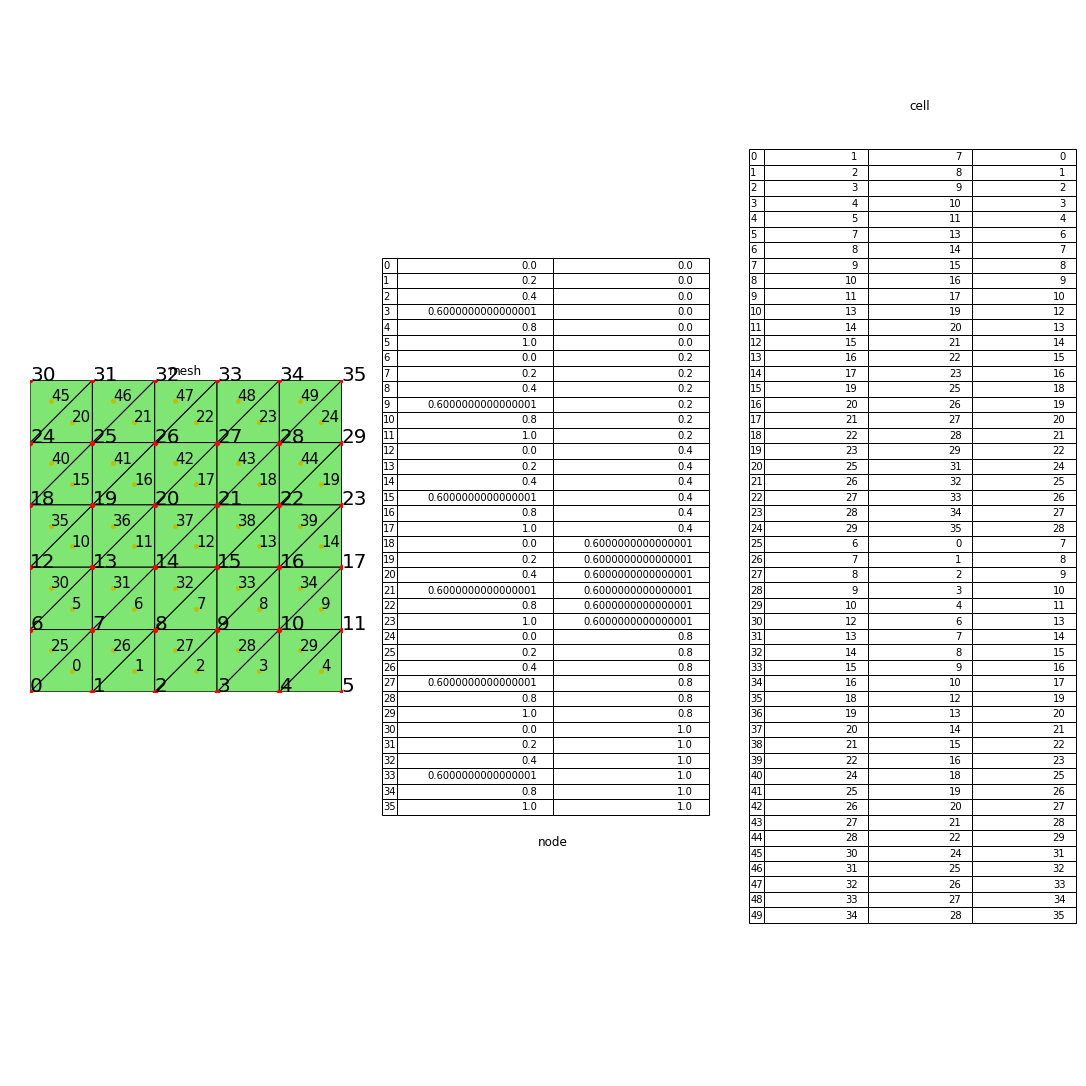

In [5]:
from fealpy.mesh.TriangleMesh import TriangleMesh
import matplotlib.pyplot as plt 
%matplotlib inline
tmesh = TriangleMesh(node, cell)
fig, axes = plt.subplots(1, 3,figsize=(15,15))
tmesh.add_plot(axes[0])
tmesh.find_node(axes[0], showindex=True, markersize=20, fontsize=20)
tmesh.find_cell(axes[0], showindex=True, markersize=15, fontsize=15)
axes[0].set_title('mesh')
for ax in axes.reshape(-1)[1:]:
    ax.axis('tight')
    ax.axis('off')
axes[1].table(cellText=node, rowLabels=np.arange(NN), loc='center')
axes[1].set_title('node', y=0.2)
axes[2].table(cellText=cell, rowLabels=np.arange(2*NC), loc='center')
axes[2].set_title('cell', y=0.9)
plt.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.show()